<a href="https://colab.research.google.com/github/mobinapourmoshir/Functional-Deep-Learning/blob/main/ML_Classifiers_Using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 3: A Tour of Machine Learning Classifiers Using Scikit-Learn**

Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python
Book by Liu Yuxi, Sebastian Raschka, and Vahid Mirjalili


Main Ideas of Chapter 3

**Overview of Popular Classifiers:**
The chapter introduces widely used supervised learning algorithms for classification, including:

1. Logistic Regression

2. Support Vector Machines (SVMs)

3. Decision Trees

4. k-Nearest Neighbors (k-NN)

Each has its strengths, weaknesses, and assumptions, and choosing the right one depends on your data and task.

**No Free Lunch Theorem:**
There's no single best classifier for all problems. Performance depends heavily on:

- Data size and quality
- Feature selection
- Noise level
- Whether data is linearly separable

Always try and compare multiple algorithms.

**Five Steps of Supervised Learning:**
Building a classification model usually involves:

1. Selecting features and collecting labeled data
2. Choosing a performance metric (e.g., accuracy)
3. Choosing an algorithm and training a model
4. Evaluating model performance
5. Tuning hyperparameters for better results

**Using Scikit-Learn:**
The chapter demonstrates how to use scikit-learn's simple and consistent API to train models. As a first example, it shows how to train a perceptron classifier (from Chapter 2) with scikit-learn (a foundational model in ML).

**Iris Dataset as a Teaching Tool:**
The well-known Iris dataset is used throughout the chapter for hands-on examples. It's simple yet effective for illustrating model training, evaluation, and visualization.

In [1]:
# Iris data
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
# Splitting data to test and train (test size is 30% of the data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
    )
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


**Feature scaling for optimal performance(eg: gradient descent)**

- fit() calculates the mean (μ) and standard deviation (σ) of each feature from the training data.
- transform() uses those values to standardize the data (so it has mean 0 and variance 1).
- We must use the same μ and σ to scale the test data so results are comparable.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

-----
## **Training the Perceptron:**
A Perceptron is one of the simplest types of artificial neural networks — and also one of the earliest machine learning algorithms. It's a linear classification model used to decide between two or more classes based on input features.

- Type: Linear classification model
- Category: Supervised learning (classification)
- Nature: Shallow neural network (only one layer of weights)
- Decision boundary: Linear (a straight line or hyperplane)
- Simple and fast to train
- Works well for linearly separable data
- Foundation for more complex neural networks
- Can't handle nonlinear problems (e.g., XOR)
- Sensitive to feature scaling (that's why we standardize data first)

Think of the perceptron as a simple mathematical function that:
1. Takes several input features (numbers describing your data, like petal length, petal width, etc.).
2. Multiplies them by weights (these are learned from the data).
3. Sums them up and adds a bias term.
4. Passes the result into a step function that outputs a class label (e.g., 0 or 1).


In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Prediction
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [6]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


Each classifier in scikit-learn has a score method, which computes a classifier's prediction accuracy by combining the predict call with *accuracy_score*, as shown here:

In [7]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [20]:
# Defining plot function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
  # highlight test examples
  if test_idx is not None:
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='none', edgecolor='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='Test set')

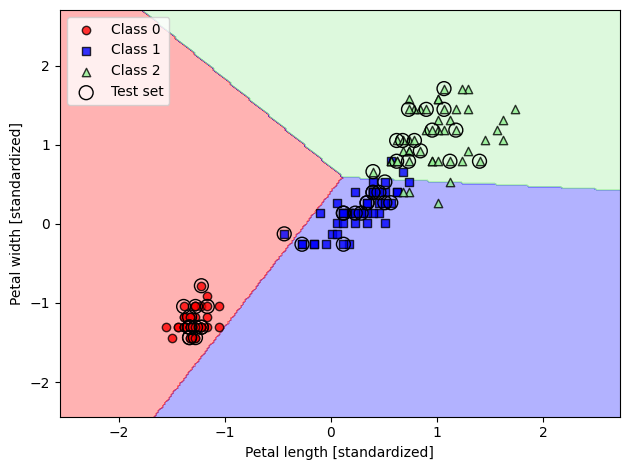

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
y=y_combined,
classifier=ppn,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Additional perceptron settings:**
The Perceptron, as well as other scikit-learn functions and classes, often has additional
parameters that we omit for clarity. You can read more about those parameters using
the help function in Python (for instance, help(Perceptron)) or by going through the
excellent scikit-learn online documentation at http://scikit-learn.org/stable/.

----
## **Modeling class probabilities via logistic regression**
- Purpose: Logistic regression is a simple but powerful model for binary classification that estimates the probability that a sample belongs to a particular class.
- It's called “regression” historically, but it's actually a classification model.
- Unlike the perceptron, logistic regression converges even if data isn't perfectly separable.
- It models the conditional probability  p(y=1|x) directly and outputs a value between 0 and 1.

Logistic regression predicts the probability that a sample belongs to class 1.
It models the log-odds of this probability as a linear combination of features:

$\text{logit}(p) = log(\frac{p}{1-p}) = w_1*x_1 + w_2*x_2 + ... + w_m*x_m + b = \sum_{i=j}w_jx_j +b = \mathbf{w}^⊤ \mathbf{x} +b$

The inverse of this (sigmoid) maps any real number to a probability (0, 1):

$p = \frac{1}{1 + exp(-(w·x + b))}$

Finally, we classify based on a threshold (usually 0.5):

$y_{hat} = 1 $ if $p >= 0.5 $ else $0$

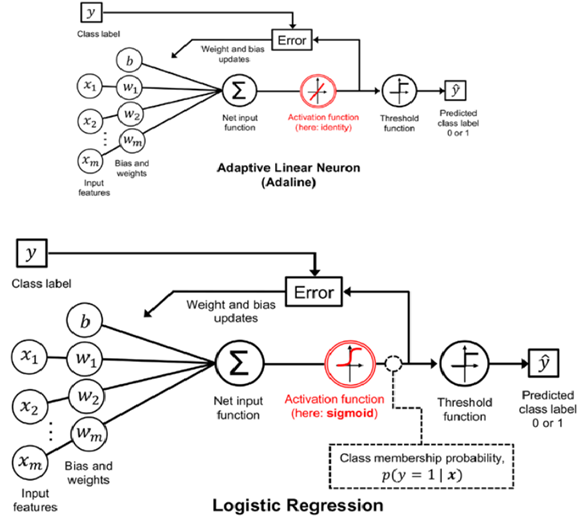

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1383144688.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma (z)$')


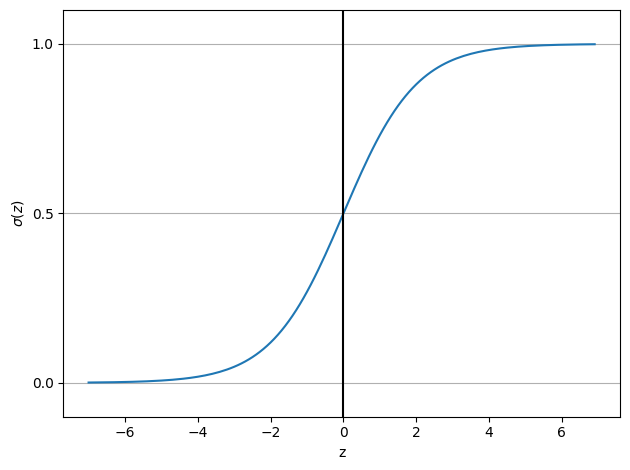

In [13]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

**LogisticRegressionGD - Overview**

This class implements logistic regression from scratch using gradient descent.
It learns how to classify data into two classes (binary classification) by finding the best weights and bias that minimize the log loss (also called cross-entropy loss).

Class Parameters:
- eta: Learning rate - how much we update the weights each step.
- n_iter: Number of training iterations (epochs).
- random_state: Sets the seed for random initialization (for reproducibility).

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_ : 1d-array
        Weights after training.
    b_ : float
        Bias unit after fitting.
    losses_ : list
        Loss values (log loss) in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            # Gradient descent weight update
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()

            # Log loss calculation
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))) / X.shape[0]
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

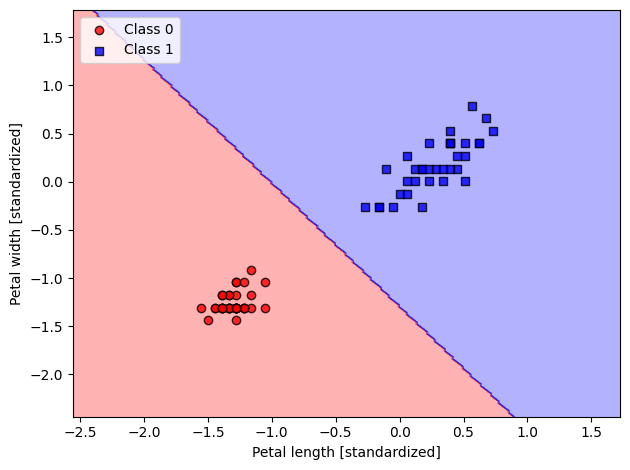

In [21]:
# --- Training on binary subset (class 0 vs class 1) ---
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

# --- Plot decision regions ---
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd,
                      test_idx=None) # No test set for this plot
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In LogisticRegressionGD in the previous code, weight and bias update rules remained unchanged. Gradient descent “walks downhill” on the loss surface by updating weights in the direction that reduces the error, and for logistic regression, this process is almost identical to linear models, only the loss and activation differ.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


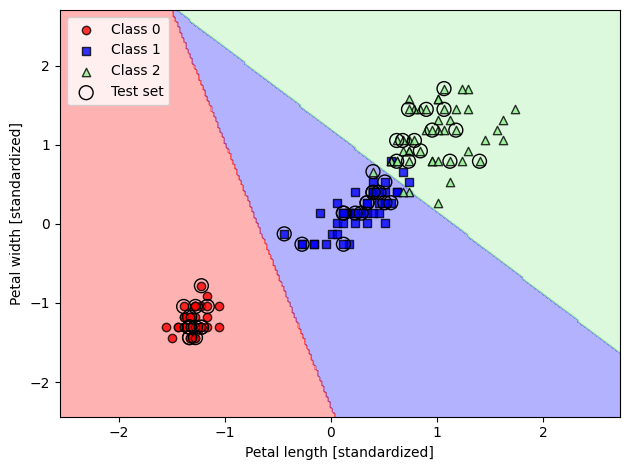

In [22]:
# Training a Logistic Regression Model with scikit-learn
#  multi_class='ovr' for illustration purposes
#  Multilabel classification: multi_class='multinomial' is default choice in scikit-learn's LogisticRegression class
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Instead of only predicting a label, logistic regression can predict the probability that a sample belongs to each class.

In the following code:
- Each row = one test sample.
- Each column = probability of that class.
- Each row sums to 1.

In [23]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

From Probabilities to Class Labels: The highest probability determines the predicted class.

In [25]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

---
## **Maximum margin classification with support vector machines**

**The Goal of SVMs:**
SVMs try to find a decision boundary (a line, plane, or hyperplane) that best separates different classes.
But instead of just any boundary, SVM chooses the one that maximizes the margin, the distance between the boundary and the closest training points from each class.

**Margin and Support Vectors:**
- The margin is the “gap” between the decision boundary and the nearest data points.
- These closest points are called support vectors, and they are critical because they “support” or define the decision boundary.
- The idea is that a wider margin makes the classifier more robust and generalizes better to new data.

**Why Maximum Margin Matters:**
- A classifier with a larger margin is less sensitive to noise and outliers.
- It's also more likely to perform well on unseen data because it avoids overfitting.

**Mathematically:**

SVM solves an optimization problem that maximizes the margin while still classifying all training points correctly (or as correctly as possible in the soft-margin version).

**Soft-Margin SVM:**

- Real-world data is rarely perfectly separable.
- SVM allows some misclassifications by introducing a penalty term (C), balancing margin size with classification accuracy.


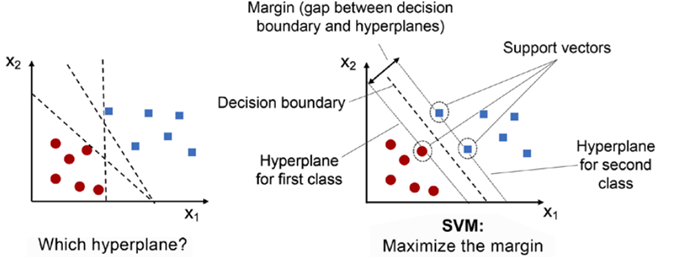

C is a regularization parameter that controls the trade-off between:
- Maximizing the margin (making the decision boundary wider and more general)
- Classifying all training points correctly (allowing fewer errors)

It tells the SVM how much to penalize misclassified points during training.

**Large C (e.g., 100 or 1000):**
- The model tries hard to classify every training example correctly.
- The margin becomes smaller and tighter.
-It can lead to overfitting (too focused on training data, less generalization).

**Small C (e.g., 0.1 or 0.01):**
- The model allows some misclassifications but aims for a wider margin.
- The decision boundary is smoother and more general.
- It can help prevent overfitting and improve performance on unseen data.
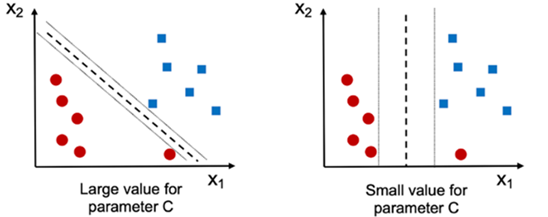

Decreasing the value of C increases the bias (underfitting) and lowers
the variance (overfitting) of the model

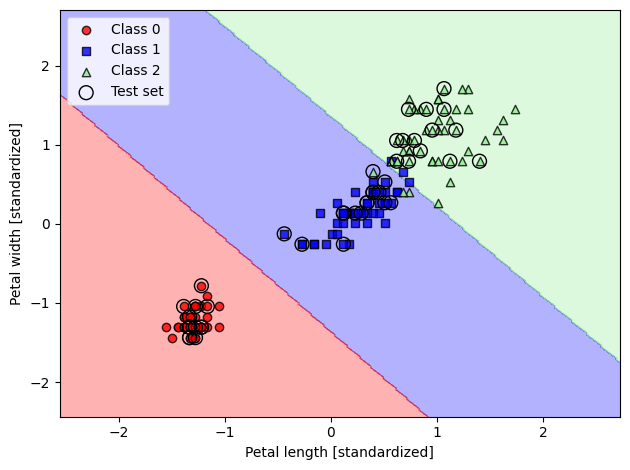

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

SGDClassifier in scikit-learn is a general-purpose linear classifier that trains models using stochastic gradient descent (SGD).
The key idea is: by just changing the loss parameter, you can turn it into different algorithms, like a perceptron, logistic regression, or SVM, without writing separate code for each.

- **perceptron:** Uses the perceptron loss, which updates weights whenever a sample is misclassified.
- **logistic regression:** Uses the log-loss (cross-entropy), which outputs probabilities and is smoother and more stable than perceptron loss.
- **linear SVM:** Uses the hinge loss, which focuses on maximizing the margin between classes.

In [27]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

----
## **Solving nonlinear problems using a kernel SVM**

Until now, SVMs we discussed create a linear decision boundary with a straight line (or plane) that separates classes.
But many real-world datasets are not linearly separable, i.e., you can't draw a straight line to separate the classes.

**The Solution: Kernel Trick:** A kernel SVM solves this by transforming the original data into a higher-dimensional space where it is linearly separable, without explicitly computing the transformation. This is called the kernel trick.
- It maps the data using a function 𝜙(𝑥) into a new space.
- In that new space, the SVM can find a linear boundary, which corresponds to a nonlinear boundary in the original space.
- The kernel computes the similarity between data points instead of transforming them explicitly.
- The SVM then finds a linear separator in this high-dimensional feature space, which becomes a nonlinear decision boundary in the original space.

**Common Kernel Functions**
- RBF (Radial Basis Function / Gaussian): Most common, flexible for many shapes.
- Polynomial: Captures curved boundaries.
- Sigmoid: Similar to neural network activations.

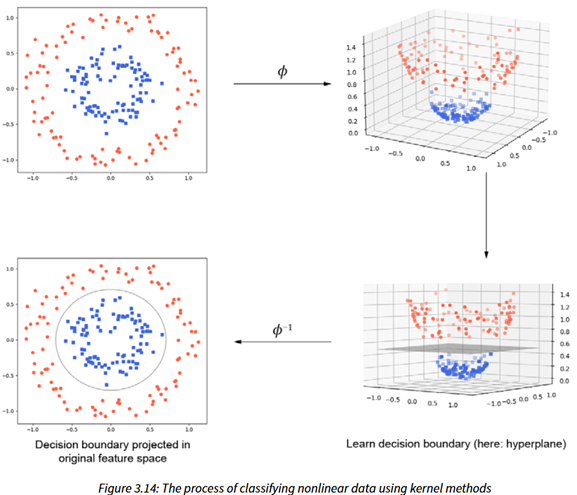

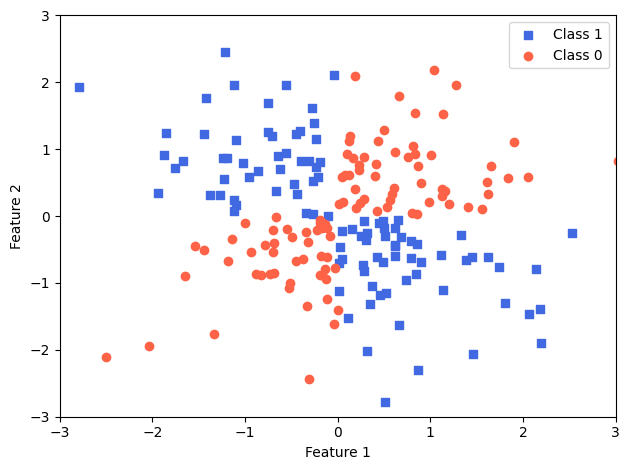

In [28]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### **Using the kernel trick to find separating hyperplanes in a high-dimensional space**

Many real-world datasets are not linearly separable in their original feature space, meaning you can't draw a straight line (or hyperplane) to separate the classes.

The kernel trick is a clever mathematical method used by SVMs to map data into a higher-dimensional space where a linear separation is possible — without ever computing that mapping directly.

Instead of transforming the data with an explicit function $ϕ(x)$, the SVM uses a kernel function $K(x_i,x_j)$that computes the inner product in the high-dimensional space directly.

$K(x_i,x_j) = ϕ(x_i)^⊤ ϕ(x_j)$

This allows the SVM to work as if it were operating in a high-dimensional space, without the computational cost of actually doing so.

Common Kernel Functions: RBF (Gaussian), Polynomial, Sigmoid

Why it's powerful?
- It transforms nonlinear problems into linear ones in a higher-dimensional space.
- It avoids explicitly computing large feature vectors, which would be computationally expensive or impossible.

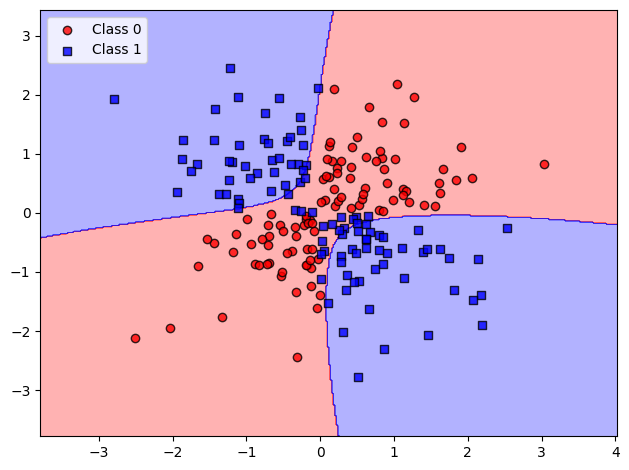

In [29]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

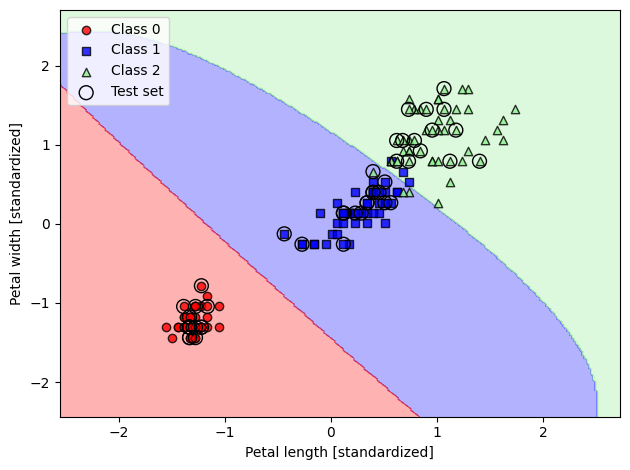

In [30]:
# Iris flower dataset:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Now, let's increase the value of 𝛾 and observe the effect on the decision boundary:  From the plot below, the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of 𝛾.

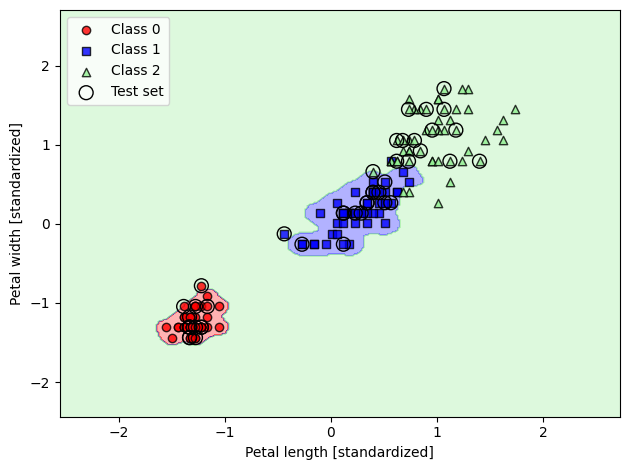

In [31]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
## **Decision tree learning**

A decision tree is a simple but powerful machine learning algorithm used for classification and regression.
It works like a flowchart: each node represents a question about a feature, each branch represents an answer, and each leaf node gives a final prediction (class label or value).

1. Start with all training data at the root.
2. Split the data based on a feature and a threshold that best separates the classes.
3. Repeat this process for each branch (subsets) recursively — creating a tree of decisions.
4. Stop when:
- All samples in a node belong to the same class, or
- A stopping criterion (like maximum depth) is reached.

At prediction time, a new sample just follows the path of decisions down the tree until it reaches a leaf node.

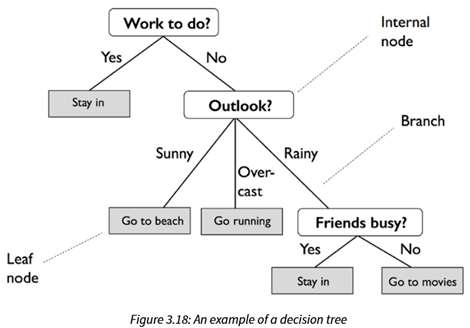

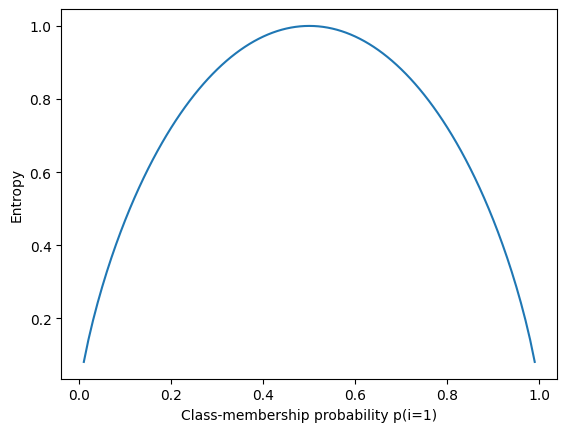

In [32]:
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show() # Entropy values for different class-membership probabilities

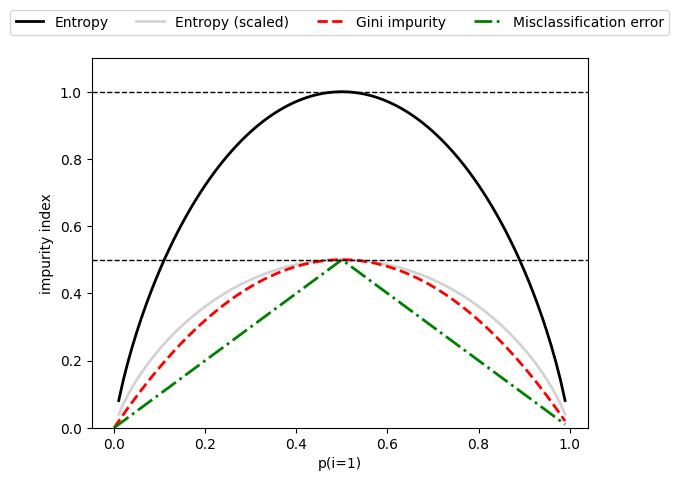

In [35]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
  return p*(1 - p) + (1 - p)*(1 - (1-p))
def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
  return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity',
                           'Misclassification error'],
                            ['-', '-', '--', '-.'],
                             ['black', 'lightgray',
                              'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab,
                 linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

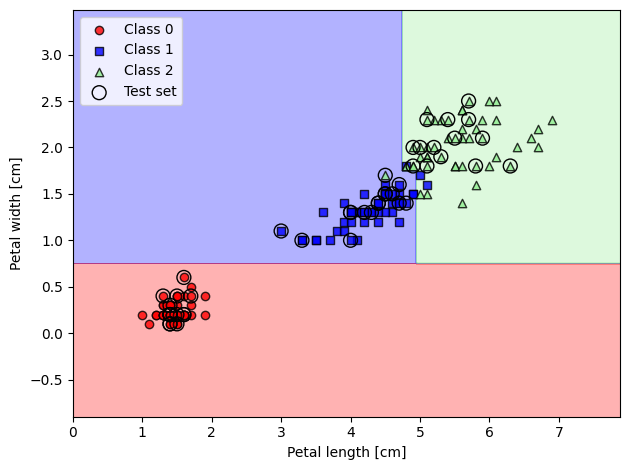

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

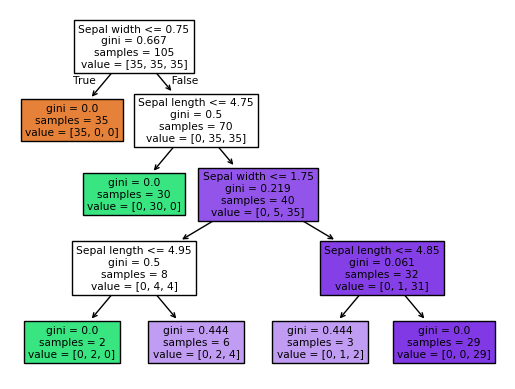

In [37]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()